<a href="https://colab.research.google.com/github/naveenkumar1805/Eda_projects-/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
file_path='/content/drive/MyDrive/Copy of Play Store Data.csv'
df=pd.read_csv(file_path)

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Copy of User Reviews.csv')

In [ ]:
df.shape ,df1.shape

((10841, 13), (64295, 5))

In [ ]:
df.columns, df1.columns

(Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
        'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
        'Android Ver'],
       dtype='object'),
 Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
        'Sentiment_Subjectivity'],
       dtype='object'))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


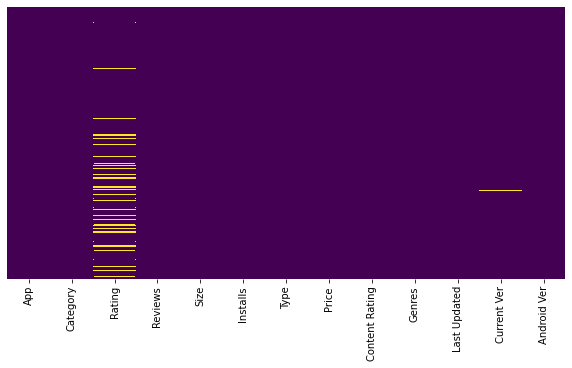

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');
#plt.xlabel("Name of column")
#plt.ylabel("places of missing values")


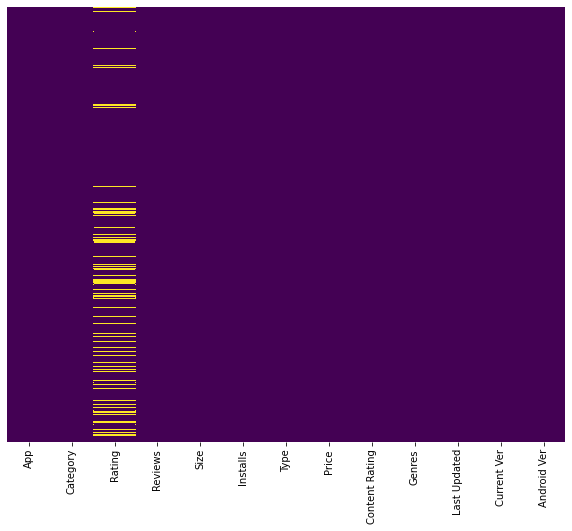

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(10,8)
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Rating', 'Type', 'Content Rating', 'Current Ver', 'Android Ver']

In [ ]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [ ]:
df.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [ ]:
df["Type"].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
df['Type'].value_counts()

Free    10039
Paid      800
0           1
Name: Type, dtype: int64

In [ ]:
df['Category'].unique(), df['Rating'].unique(), df['Installs'].unique(),df['Type'].unique(),df['Price'].unique(), df['Content Rating'].unique() , df['Genres'].unique(),df['Android Ver'].unique()

(array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
        'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
        'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
        'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
        'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
        'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
        'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
        'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
        '1.9'], dtype=object),
 array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
         nan,  4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,
         3. ,  1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,
         1.8,  2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ]),
 array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
        '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100

In [ ]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df['Category'].value_counts().reset_index()

,index,Category
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


In [ ]:
df['Category'].value_counts().reset_index().rename(columns = {'index':'category','Category':'value'})

,category,value
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


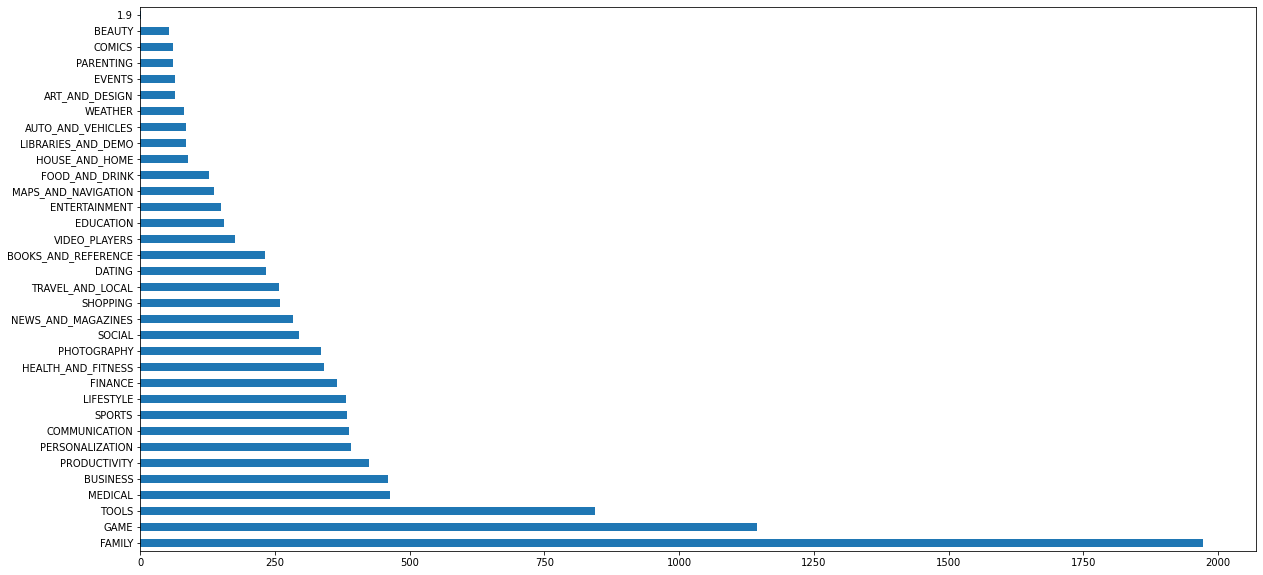

In [ ]:
df['Category'].value_counts().plot(kind='barh',figsize=(20,10));

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


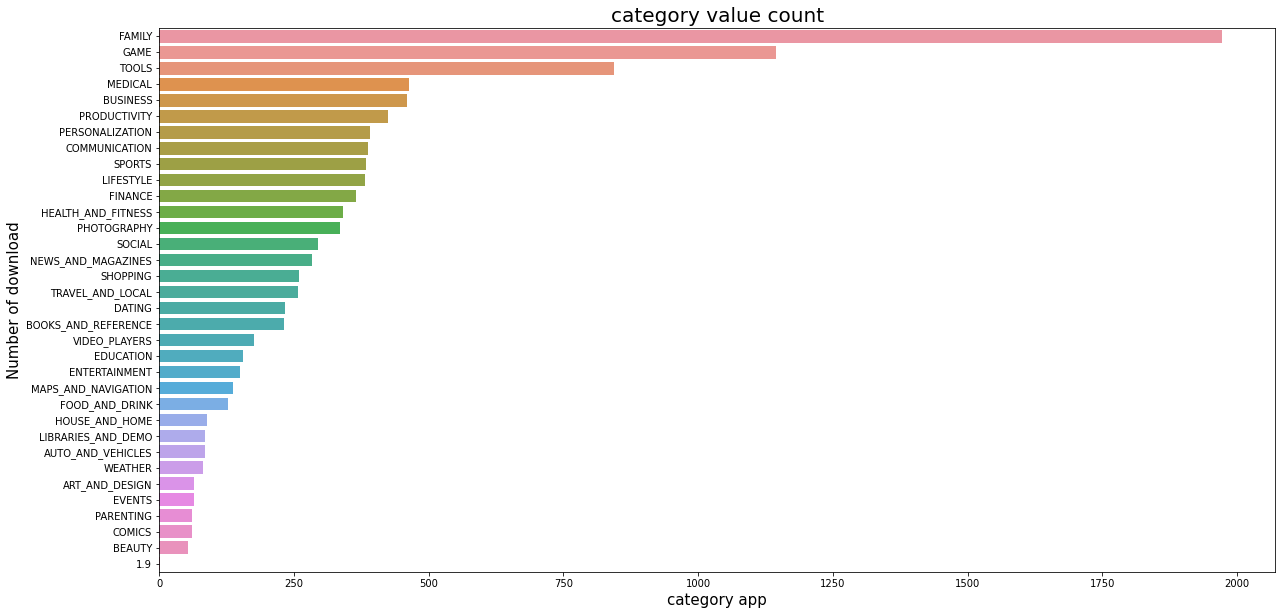

In [ ]:
category_count  = df['Category'].value_counts()
#city_count = city_count[:10,]
plt.figure(figsize=(20,10))
sns.barplot(category_count.values,category_count.index,alpha=1);
plt.ylabel('Number of download', fontsize=15)
plt.xlabel('category app', fontsize=15)
plt.title( "category value count", fontsize=20)
plt.show();

In [ ]:
df['Category'].nunique()

34

In [ ]:
install_category=df.groupby(['Category'])['Installs'].count().reset_index()
install_category.sort_values('Installs',axis=0,ascending=False).rename(columns={'Installs':'Maximum Installs'}).head()

,Category,Maximum Installs
12,FAMILY,1972
15,GAME,1144
30,TOOLS,843
21,MEDICAL,463
5,BUSINESS,460


In [ ]:
df.groupby(['Installs','Category']).count().unstack()

App                                          \
Category        1.9 ART_AND_DESIGN AUTO_AND_VEHICLES BEAUTY   
Installs                                                      
0               NaN            NaN               NaN    NaN   
0+              NaN            1.0               NaN    NaN   
1+              NaN            NaN               1.0    NaN   
1,000+          NaN            3.0               8.0    1.0   
1,000,000+      NaN            4.0              13.0    8.0   
1,000,000,000+  NaN            NaN               NaN    NaN   
10+             NaN            NaN               5.0    NaN   
10,000+         NaN           11.0               6.0   13.0   
10,000,000+     NaN            5.0               2.0    1.0   
100+            NaN            1.0               6.0    5.0   
100,000+        NaN           19.0              23.0    8.0   
100,000,000+    NaN            NaN               NaN    NaN   
5+              NaN            NaN               2.0    NaN   
5,000+          NaN            5.0               2.0    3.0   
5,000,000+      NaN            3.0               3.0    1.0   
50+             NaN            NaN               1.0    1.0   
50,000+         NaN            6.0               5.0    5.0   
50,000,000+     NaN            1.0               NaN    NaN   
500+            NaN            NaN               3.0    1.0   
500,000+        NaN            6.0               5.0    6.0   
500,000,000+    NaN            NaN               NaN    NaN   
Free            1.0            NaN               NaN    NaN   

                                                                         \
Category       BOOKS_AND_REFERENCE BUSINESS COMICS COMMUNICATION DATING   
Installs                                                                  
0                              NaN      NaN    NaN           NaN    NaN   
0+                             NaN      1.0    NaN           NaN    NaN   
1+                             1.0      5.0    NaN           1.0    2.0   
1,000+                        34.0     49.0    1.0          22.0   17.0   
1,000,000+                    20.0     46.0   12.0          45.0   32.0   
1,000,000,000+                 1.0      NaN    NaN          19.0    NaN   
10+                           19.0     42.0    NaN          19.0   10.0   
10,000+                       25.0     46.0   11.0          25.0   27.0   
10,000,000+                   24.0     18.0    2.0          57.0   17.0   
100+                           7.0     76.0    1.0          33.0   19.0   
100,000+                      20.0     37.0   11.0          19.0   37.0   
100,000,000+                   6.0      3.0    NaN          39.0    NaN   
5+                             7.0     18.0    NaN           2.0    1.0   
5,000+                        16.0     17.0    5.0          19.0   13.0   
5,000,000+                    10.0     23.0    4.0          25.0    9.0   
50+                            3.0     25.0    1.0           5.0    6.0   
50,000+                       12.0     12.0    7.0          10.0    5.0   
50,000,000+                    NaN      7.0    NaN          10.0    NaN   
500+                           9.0     23.0    NaN          11.0   13.0   
500,000+                      17.0     12.0    5.0           9.0   26.0   
500,000,000+                   NaN      NaN    NaN          17.0    NaN   
Free                           NaN      NaN    NaN           NaN    NaN   

                          ...     Android Ver                           \
Category       EDUCATION  ... PERSONALIZATION PHOTOGRAPHY PRODUCTIVITY   
Installs                  ...                                            
0                    NaN  ...             NaN         NaN          NaN   
0+                   NaN  ...             1.0         NaN          1.0   
1+                   NaN  ...             7.0         NaN          4.0   
1,000+               2.0  ...            41.0        18.0         35.0   
1,000,000+          52.0  ...            47.0 

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(kind='bar',x,color='r')
plt.ylabel('Number of download', fontsize=15)
plt.xlabel('category app', fontsize=15)
plt.title( "category value count", fontsize=20)
plt.show();

SyntaxError: ignored

In [ ]:
list(df['Rating'].mode())

[4.4]

In [ ]:
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())



0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [ ]:
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)


In [ ]:
df['Type'].value_counts()

Free    10040
Paid      800
0           1
Name: Type, dtype: int64

In [ ]:
App_type=df['Type'].value_counts().values
App_type

array([10040,   800,     1])

In [ ]:
App_type_index=df['Type'].value_counts().index


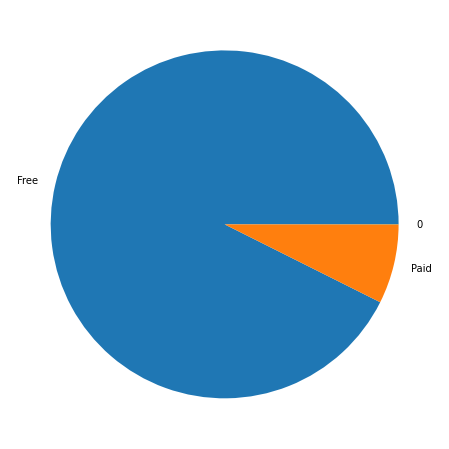

In [ ]:
##pei chart

plt.pie(App_type,labels=App_type_index);

In [ ]:
print(df['Current Ver'].mode())

0    Varies with device
dtype: object


In [ ]:
print(df['Android Ver'].mode())

In [ ]:
df.tail()

In [ ]:
df1.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.boxplot();

In [ ]:
df.describe()

In [ ]:
df.nunique()

In [ ]:
threshold=len(df)
threshold


In [ ]:
df['Price'].unique()

In [ ]:
df=pd.read_csv(file_path)
df['Size'].nunique()

In [ ]:
df['Size'].unique()

In [ ]:
df['Size']=pd.to_numeric(df['Size'],errors='coerce')

In [ ]:
df['Size'].unique()

In [ ]:
df.describe()

In [ ]:
Rating=df['Rating']
df['Rating'].fillna(Rating.median,inplace=True)


In [ ]:
df.isnull().sum()

In [ ]:
df['Reviews']=pd.to_numeric(df['Reviews'],errors='coerce')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['Installs']=df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))


df['Installs']


In [ ]:
df['Installs']=pd.to_numeric(df['Installs'],errors='coerce')
df['Installs']=df['Installs'].apply(lambda x: float(x))


In [ ]:
df.info()

In [ ]:
df.dtypes['Installs'],  df.Installs.dtypes

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df['Size']=pd.to_numeric(df['Size'], errors='coerce')


In [ ]:
df.info()

In [ ]:

df['Size']=df['Size'].apply(lambda x: str(x).replace())

In [ ]:
df=pd.DataFrame(df2)
def strip(bytesData):
        if "k" in bytesData:
                bytesData/1000
        elif "M" in bytesData:
                bytesData/1000000

df['Size']=df.apply(lambda x: strip(x['byteData']), axis=1)

In [ ]:
df2=df['Size']

In [ ]:
sns.pairplot(df)

In [ ]:
df=sns.load_dataset("Play Store Data.csv")